In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd 
import numpy as np
import statsmodels.api as sm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
da = pd.read_csv("nhanes_2015_2016.csv")
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


## Frequency table and Dealing with missing values

In [3]:
# Frequency table 
da.DMDEDUC2.value_counts()

4.0    1621
5.0    1366
3.0    1186
1.0     655
2.0     643
9.0       3
Name: DMDEDUC2, dtype: int64

In [4]:
print(da.DMDEDUC2.value_counts().sum())
print(da.shape[0])

5474
5735


Note that `value_counts` method exclude missing values.

In [5]:
# missing value
pd.isnull(da.DMDEDUC2).sum()

261

In [6]:
# it is useful to 'replace' integer codes with a text label that reflect the code's meaning 
da['DMDEDUC2x'] = da.DMDEDUC2.replace({1: '<9', 3: 'HS/GED', 4: 'Some college/AA', 5 : 'college',
                                      7: 'Refused', 9: 'Dont know'})
da.DMDEDUC2x.value_counts()

Some college/AA    1621
college            1366
HS/GED             1186
<9                  655
2.0                 643
Dont know             3
Name: DMDEDUC2x, dtype: int64

In [7]:
# transfer it to proportion
x = da.DMDEDUC2x.value_counts()
x / x.sum()

Some college/AA    0.296127
college            0.249543
HS/GED             0.216661
<9                 0.119657
2.0                0.117464
Dont know          0.000548
Name: DMDEDUC2x, dtype: float64

In [8]:
# Treat the missing response
da['DMDEUC2x'] = da.DMDEDUC2x.fillna('missing')
da.DMDEUC2x.value_counts()

Some college/AA    1621
college            1366
HS/GED             1186
<9                  655
2.0                 643
missing             261
Dont know             3
Name: DMDEUC2x, dtype: int64

## Graphical summaries

Text(0.5, 0, 'Body weight')

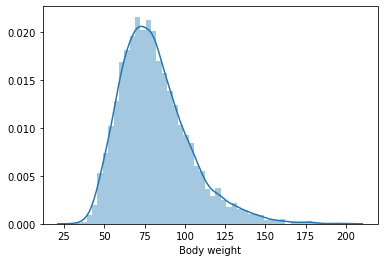

In [9]:
# Quantitative variables can be effectively summarized graphically. 
sns.distplot(da.BMXWT.dropna()).set_xlabel('Body weight')

Text(0.5, 0, 'Systolic blood pressure measurement ')

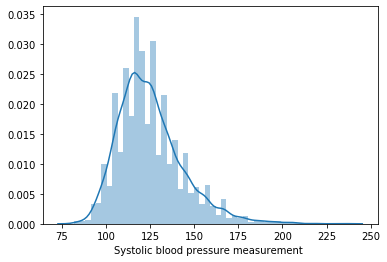

In [10]:
sns.distplot(da.BPXSY1.dropna()).set_xlabel('Systolic blood pressure measurement ')

## Compare several distribution,using side-by-side boxplots

Text(0, 0.5, '"Blood pressure in mm/Hg"')

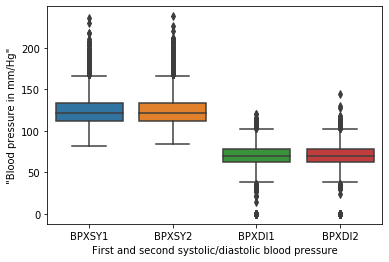

In [11]:
bp = sns.boxplot(data = da.loc[:,["BPXSY1", "BPXSY2", "BPXDI1", "BPXDI2"]])
bp.set_xlabel('First and second systolic/diastolic blood pressure')
bp.set_ylabel('"Blood pressure in mm/Hg"')

## Stratification 

Text(0, 0.5, 'First systolic blood pressure')

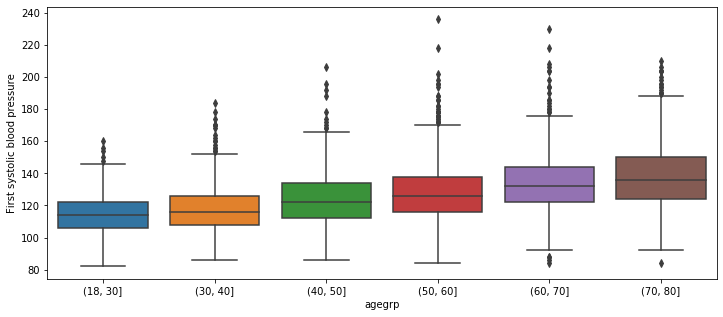

In [12]:
da['agegrp'] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])

plt.figure(figsize = (12,5))
sns.boxplot(x = 'agegrp', y = 'BPXSY1', data = da).set_ylabel('First systolic blood pressure')

Note that it makes boxplot of BPXY1(first Systolic blood pressure measurement) stratified by age group

Text(0, 0.5, 'First systolic blood pressure')

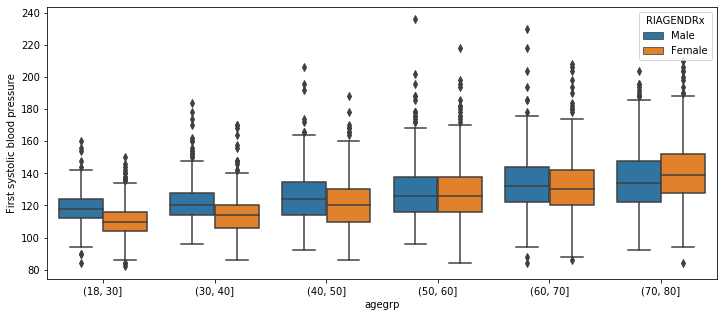

In [13]:
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})
plt.figure(figsize = (12,5))
sns.boxplot(x = 'agegrp', y = 'BPXSY1', hue="RIAGENDRx", data = da).set_ylabel('First systolic blood pressure') #hue: order to plot the categorical levels

Interpretation: We see from the figure above that within each gender, older people tend ot have higher blood pressure than younger people.However, within an age band, the relationship between gender and systolic blood pressure is somewhat complex -- in yougner people, men have substantially higher blood pressures than women of the same age. However, for people older than 50, this relationship becomes much weaker, and among people older than 70 it appears to reverse. It is also notable that the variation of these distributions,reflected in the height of each box in the boxplot, increases with age

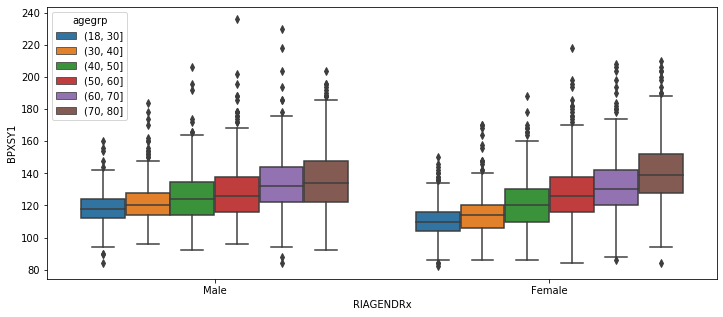

In [14]:
# when sstratifying on two factors(age and gender), we can group the boxes first by age, and within age bands by gender as above
# DO opposite, group first by gender, and then within gender group by age bands
plt.figure(figsize = (12,5))
sns.boxplot(x="RIAGENDRx", y="BPXSY1", hue="agegrp", data=da)

In [15]:
da.groupby('agegrp')['DMDEDUC2x'].value_counts()

agegrp    DMDEDUC2x      
(18, 30]  Some college/AA    364
          college            278
          HS/GED             237
          2.0                 99
          <9                  47
(30, 40]  Some college/AA    282
          college            264
          HS/GED             182
          2.0                111
          <9                  93
(40, 50]  Some college/AA    262
          college            260
          HS/GED             171
          2.0                112
          <9                  98
(50, 60]  Some college/AA    258
          HS/GED             220
          college            220
          2.0                122
          <9                 104
(60, 70]  Some college/AA    238
          HS/GED             192
          college            188
          <9                 149
          2.0                111
(70, 80]  Some college/AA    217
          HS/GED             184
          <9                 164
          college            156
          2.0    

Interpretation: yougner people as a group have higher educational attainment than older people as a group. As these young pepople grou older, the cross sectional relationship between age and educational attainment will change.

In [16]:
dx = da.loc[~da.DMDEDUC2x.isin(['Dont know','missing']),:]
dx = dx.groupby(["agegrp", "RIAGENDRx"])["DMDEDUC2x"]
dx = dx.value_counts()
dx = dx.unstack()
dx = dx.apply(lambda x: x / x.sum(), axis = 1)
print(dx.to_string(float_format = '%.3f'))

DMDEDUC2x            2.0    <9  HS/GED  Some college/AA  college
agegrp   RIAGENDRx                                              
(18, 30] Female    0.080 0.049   0.215            0.374    0.282
         Male      0.117 0.042   0.250            0.333    0.258
(30, 40] Female    0.089 0.097   0.165            0.335    0.314
         Male      0.151 0.103   0.227            0.269    0.251
(40, 50] Female    0.110 0.106   0.173            0.313    0.299
         Male      0.142 0.112   0.209            0.262    0.274
(50, 60] Female    0.117 0.102   0.234            0.302    0.245
         Male      0.148 0.123   0.242            0.256    0.231
(60, 70] Female    0.118 0.188   0.206            0.293    0.195
         Male      0.135 0.151   0.231            0.249    0.233
(70, 80] Female    0.105 0.225   0.240            0.281    0.149
         Male      0.113 0.180   0.215            0.255    0.237


Note: Pivot the education level into columns, and normalize the coutns so that they sum to 1.
one notable observation from this table is that for people up to age around 60, women are more liekly to have graduated from college than men, but for people over aged 60, this relationship reverses

### Chanllege 1
Relabel the marital status variable DMDMARTL to have brief but informative character labels. Then construct a frequency table of these values for all people, then for women only, and for men only. Then construct these three frequency tables using only people whose age is between 30 and 40.

In [17]:
da['DMDMARTL2'] = da['DMDMARTL'].replace({1:'Married', 2:'Widowed',3:'Divorced',4:'Separated',
                                         5:'Never married',6:'Living with partner',77:'Refused',99:'dont know'})
da['agegrpx'] = pd.cut(da.RIDAGEYR, [30,40])

a = da.groupby([da["RIAGENDRx"],da['agegrpx']])['DMDMARTL2'].value_counts().unstack()
a

,DMDMARTL2,Divorced,Living with partner,Married,Never married,Refused,Separated,Widowed
RIAGENDRx,agegrpx,,,,,,,
Female,"(30, 40]",43.0,57.0,258.0,97.0,NaN,17.0,2.0
Male,"(30, 40]",24.0,72.0,258.0,89.0,1.0,12.0,2.0


# understanding multivariate relationships

A scatterplot is a very common and easily-understood visualization of quantitative bivariate data. Below we make a scatterplot of arm length against leg length. The arm length([BMXARML])is plotted on the vertical axis and leg length([BMXLEG]) is plotted on the horizontal axis

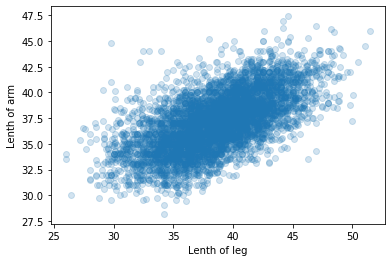

In [18]:
bp = sns.regplot(x = 'BMXLEG', y = 'BMXARML', data = da, fit_reg = False, scatter_kws ={'alpha' :0.2})
_ = bp.set_xlabel('Lenth of leg')
_ = bp.set_ylabel('Lenth of arm')

## Avoid overplotting

Note that, in the plot below, darker color indicate where a greater number of points fall. The two margins show the densities for the arm length and leg length separately,while the plot in the center shows their density jointly. Pearsonr values approaching 1 indicating a more perfect positive dependece. 0.62 would be considered a moderately strong positive dependence

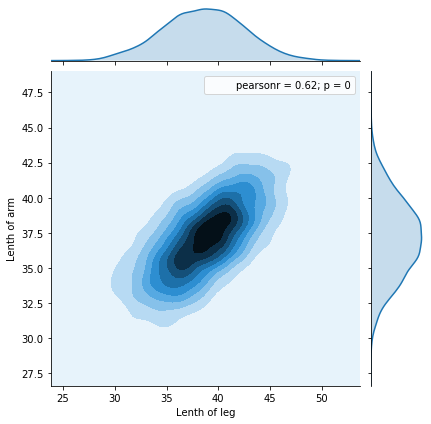

In [19]:
bp = sns.jointplot(x = 'BMXLEG', y = 'BMXARML', kind = 'kde', data = da).annotate(stats.pearsonr)
bp.set_axis_labels('Lenth of leg','Lenth of arm')

we see that systolic and diastolic blood pressure (essentially the maximum and minimum blood pressure between two consecutive heart beats). Correlation coefficient of 0.32 indicates that some people have unusually high systolic blood pressure but have average diastolic blood pressure, and vice versa

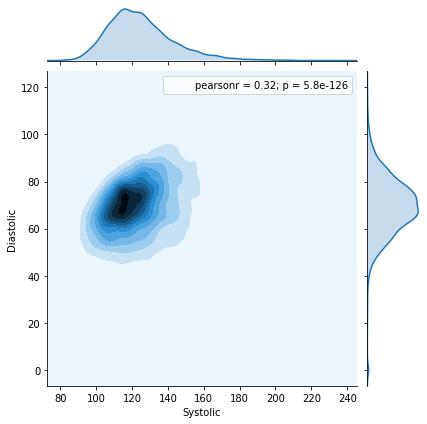

In [20]:
bp = sns.jointplot(x = 'BPXSY1', y = 'BPXDI1', kind = 'kde', data = da).annotate(stats.pearsonr)
bp.set_axis_labels('Systolic','Diastolic')

# Heterogeneity and stratification

           BMXLEG   BMXARML
BMXLEG   1.000000  0.434703
BMXARML  0.434703  1.000000
           BMXLEG   BMXARML
BMXLEG   1.000000  0.505426
BMXARML  0.505426  1.000000


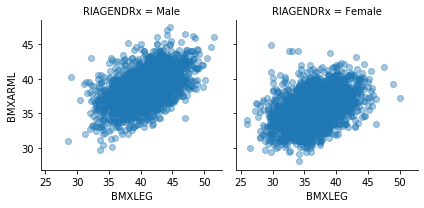

In [35]:
# relationship between leg length and arm length, stratifying first by gender,then by gender and ethnicity.
bp = sns.FacetGrid(da, col = 'RIAGENDRx').map(plt.scatter,'BMXLEG','BMXARML', alpha = 0.4)
print((da.loc[da.RIAGENDRx == 'Female',['BMXLEG','BMXARML']]).dropna().corr())
print((da.loc[da.RIAGENDRx == 'Male',['BMXLEG','BMXARML']]).dropna().corr())

The gender-stratified plot indicates that men tend to have somewhat longer arms and legs than women.correlation between arm length and length appears to be somewhat weaker in women than in men. 

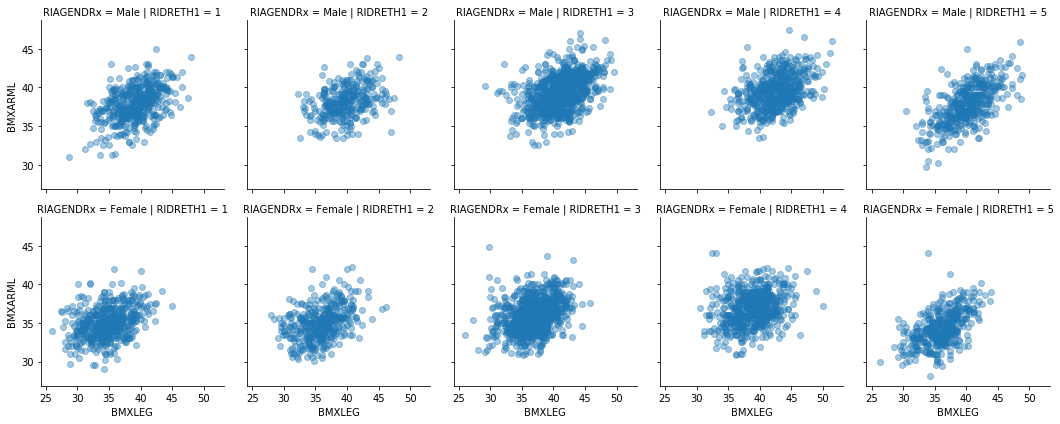

In [36]:
#stratifying the data by both gender and ethnicity. 
_ = sns.FacetGrid(da, col = 'RIDRETH1', row = 'RIAGENDRx').map(plt.scatter, 'BMXLEG','BMXARML', alpha = 0.4)

These scatterplots reveals differences in the means as well as a differeces in the degree of association(correlation) between different pairs of variables. We see that although some ethnic groups tend to have longer/shorter arms and legs than others, the relationship between arm length and leg length within gender is roughtly similar across the ethnic group.

One notable ovservation is that ethnic group5 , which consists of people who report being multi-racial or or are of any race not treated as separate group(due to small sample size), the correlation between arm length and leg length is stronger, especially for men.

# Categorical bivariate data

In [55]:
# bivariate data that are categorical 
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})
da["DMDMARTLx"] = da.DMDMARTL.replace({1: "Married", 2: "Widowed", 3: "Divorced", 4: "Separated", 5: "Never married",
                                      6: "Living w/partner", 77: "Refused"})
db = da.loc[(da.DMDEUC2x != "Dont know") & (da.DMDMARTLx != "Refused"),:]

In [56]:
x = pd.crosstab(db.DMDEUC2x, da.DMDMARTLx)
x

DMDMARTLx,Divorced,Living w/partner,Married,Never married,Separated,Widowed
DMDEUC2x,,,,,,
2.0,62,80,305,117,39,40
<9,52,66,341,65,43,88
HS/GED,127,133,550,237,40,99
Some college/AA,217,163,757,332,42,108
college,120,85,827,253,22,59


In [57]:
# Normalized by ROWS
x.apply(lambda x: x / x.sum(), axis =1)

DMDMARTLx,Divorced,Living w/partner,Married,Never married,Separated,Widowed
DMDEUC2x,,,,,,
2.0,0.096423,0.124417,0.474339,0.181960,0.060653,0.062208
<9,0.079389,0.100763,0.520611,0.099237,0.065649,0.134351
HS/GED,0.107083,0.112142,0.463744,0.199831,0.033727,0.083474
Some college/AA,0.134033,0.100679,0.467573,0.205065,0.025942,0.066708
college,0.087848,0.062225,0.605417,0.185212,0.016105,0.043192


In [41]:
#Nomarlized by columns
x.apply(lambda x: x / x.sum(), axis = 0)

DMDMARTLx,Divorced,Living w/partner,Married,Never married,Separated,Widowed
DMDEUC2x,,,,,,
2.0,0.107081,0.151803,0.109712,0.116534,0.209677,0.101010
<9,0.089810,0.125237,0.122662,0.064741,0.231183,0.222222
Dont know,0.001727,0.000000,0.000000,0.000000,0.000000,0.005051
HS/GED,0.219344,0.252372,0.197842,0.236056,0.215054,0.250000
Some college/AA,0.374784,0.309298,0.272302,0.330677,0.225806,0.272727
college,0.207254,0.161290,0.297482,0.251992,0.118280,0.148990


we see here that the plurality of divorced people have some college but have not graduated from college, while the plurality of married people are college graduates

Also, it is quite plausible that there are gender differences in the relationship between educational attainment and marital status. 

In [54]:
db = da.loc[(da.DMDEUC2x != "Dont know") & (da.DMDMARTLx != "Refused"),:]
db.groupby(["RIAGENDRx", "DMDEUC2x", "DMDMARTLx"]).size().unstack().fillna(0).apply(lambda x: x / x.sum(), axis = 0)

DMDMARTLx                  Divorced  Living w/partner   Married  \
RIAGENDRx DMDEUC2x                                                
Female    2.0              0.057093          0.068311  0.043165   
          <9               0.055363          0.060721  0.053237   
          HS/GED           0.122837          0.121442  0.086691   
          Some college/AA  0.233564          0.170778  0.136691   
          college          0.136678          0.075901  0.148921   
Male      2.0              0.050173          0.083491  0.066547   
          <9               0.034602          0.064516  0.069424   
          HS/GED           0.096886          0.130930  0.111151   
          Some college/AA  0.141869          0.138520  0.135612   
          college          0.070934          0.085389  0.148561   

DMDMARTLx                  Never married  Separated   Widowed  
RIAGENDRx DMDEUC2x                                             
Female    2.0                   0.049801   0.118280  0.076142  
          <9                    0.037849   0.166667  0.172589  
          HS/GED                0.109562   0.129032  0.185279  
          Some college/AA       0.190239   0.155914  0.210660  
          college               0.130478   0.064516  0.104061  
Male      2.0                   0.066733   0.091398  0.025381  
          <9                    0.026892   0.064516  0.050761  
          HS/GED                0.126494   0.086022  0.065990  
          Some college/AA       0.140438   0.069892  0.063452  
          college               0.121514   0.053763  0.045685

Interpretation: This analyses yields some interesting trends,notably that women are much more likely to be widowed or divorced than men(e.g. women in the HS/GED group are around 3 times more likely to be widowed than men in the HS/GED group)). One factor behind the greater number of women who are divorced and widowed cound be that women live longer than men. 

To minimize the impact this factor, we can recalculate the above table using a few narrow bands of age. 

In [69]:
dx = db.loc[(db.RIDAGEYR >= 40) & (db.RIDAGEYR <50)]
a = dx.groupby(["RIAGENDRx", "DMDEDUC2x", "DMDMARTLx"]).size().unstack().fillna(0).apply(lambda x: x/x.sum(), axis=1)

dx = db.loc[(db.RIDAGEYR >= 50) & (db.RIDAGEYR < 60)]
b = dx.groupby(["RIAGENDRx", "DMDEDUC2x", "DMDMARTLx"]).size().unstack().fillna(0).apply(lambda x: x/x.sum(), axis=1)

print(a.loc[:,['Married']].unstack())
print('')
print(b.loc[:,['Married']].unstack())

DMDMARTLx   Married                                              
DMDEDUC2x      9-11        <9   College    HS/GED Some college/AA
RIAGENDRx                                                        
Female     0.581818  0.464286  0.713376  0.476744        0.509554
Male       0.574074  0.714286  0.879310  0.616279        0.625000

DMDMARTLx   Married                                              
DMDEDUC2x      9-11        <9   College    HS/GED Some college/AA
RIAGENDRx                                                        
Female     0.490566  0.511111  0.648649  0.563107        0.496403
Male       0.666667  0.622642  0.737374  0.637255        0.555556


Conclusion: marital status is associated with many factors, including gender and educational status, but also vairs strongly by age and birth cohort

# Mixed categorical and quantitative data

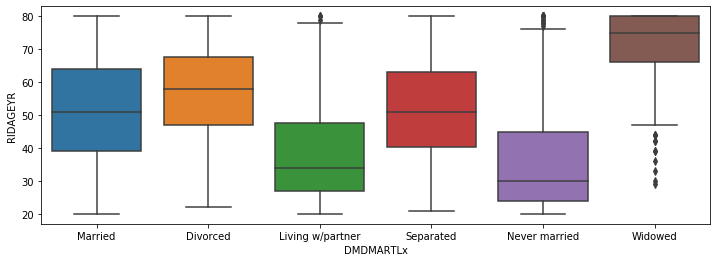

In [70]:
plt.figure(figsize=(12, 4))
a = sns.boxplot(db.DMDMARTLx, db.RIDAGEYR)

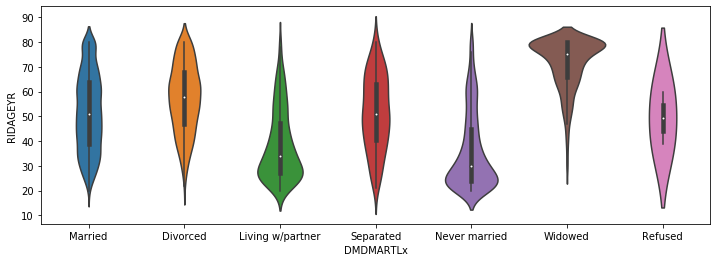

In [71]:
plt.figure(figsize=(12, 4))
a = sns.violinplot(da.DMDMARTLx, da.RIDAGEYR)

When we have enough data, a "violinplot" gives a bit more insight into the shapes of the distributions compared to a traditional boxplot. The violinplot above is based on the same data as the boxplot above. We can see quite clearly that the distributions with low mean (living with partner, never married) are strongly right-skewed, while the distribution with high mean (widowed) is strongly left-skewed. The other distributions have intermediate mean values, and are approximately symmetrically distributed. Note also that the never-married distribution has a long shoulder, suggesting that this distributions includes many people who are never-married because they are young, and have not yet reached the ages when people typically marry, but also a substantial number of people will marry for the first time anywhere from their late 30's to their mid-60's.